# Efficient frontier

In [102]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
import edhec_risk_kit as erk
import numpy as np
import pandas as pd

In [4]:
ind = erk.get_ind_returns()
ind.shape

(1110, 30)

In [26]:
ind.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


<AxesSubplot:>

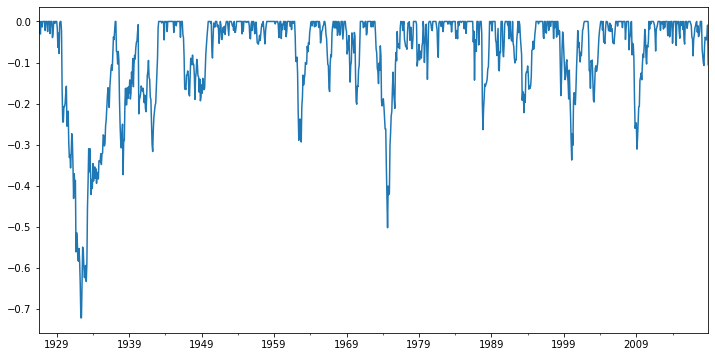

In [33]:
erk.Drawdown(ind['Food'])["% Drawdown"].plot.line(figsize=(12,6))

In [36]:
erk.var_gaussian(ind[['Beer','Food','Coal','Smoke','Fin']], modified =True)

Beer     0.033881
Food     0.061207
Coal     0.047359
Smoke    0.080292
Fin      0.075199
dtype: float64

In [37]:
erk.var_gaussian(ind, modified =True).sort_values().tail()  #high varience portfolio

Carry    0.094527
Meals    0.098403
BusEq    0.099377
Games    0.100701
Mines    0.102782
dtype: float64

In [39]:
erk.var_gaussian(ind, modified =True).sort_values().head() #low variance portfolio

Beer     0.033881
Coal     0.047359
Food     0.061207
Telcm    0.064719
Hshld    0.064886
dtype: float64

<AxesSubplot:>

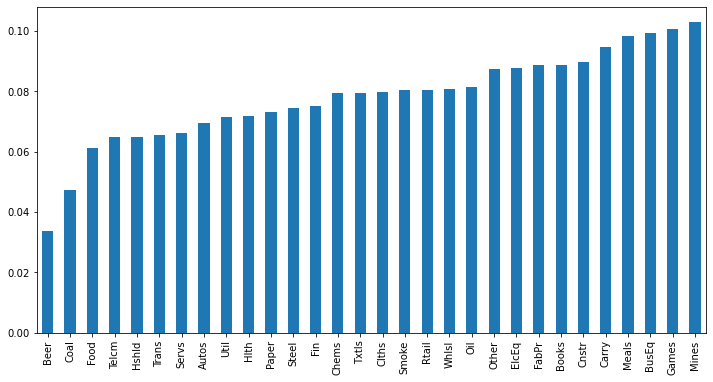

In [52]:
erk.var_gaussian(ind, modified =True).sort_values().plot.bar(figsize=(12,6))

<AxesSubplot:title={'center':'Industry Sharpe Ratios 1926-2018'}>

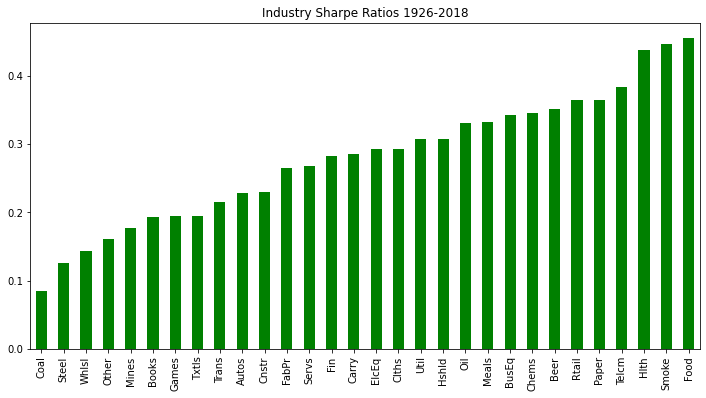

In [51]:
erk.sharpe_ratio(ind,0.03,12).sort_values().plot.bar(title="Industry Sharpe Ratios 1926-2018", color='green',figsize=(12,6))

<AxesSubplot:title={'center':'Industry Sharpe Ratios 2000-2018'}>

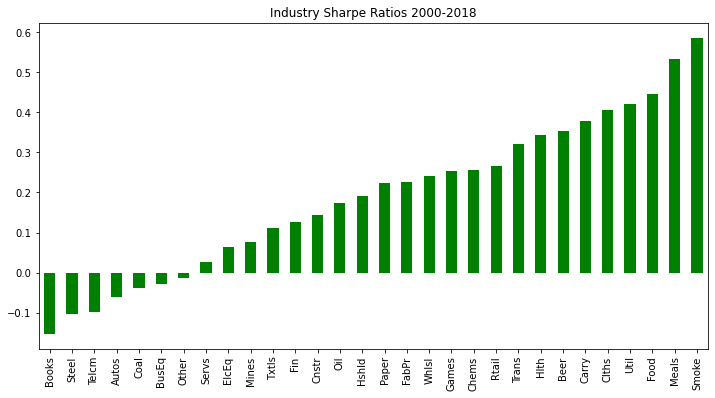

In [50]:
erk.sharpe_ratio(ind["2000":],0.03,12).sort_values().plot.bar(title="Industry Sharpe Ratios 2000-2018", color='green', figsize=(12,6))

In [53]:
er = erk.annualize_rets(ind["1995":"2000"],12)

<AxesSubplot:>

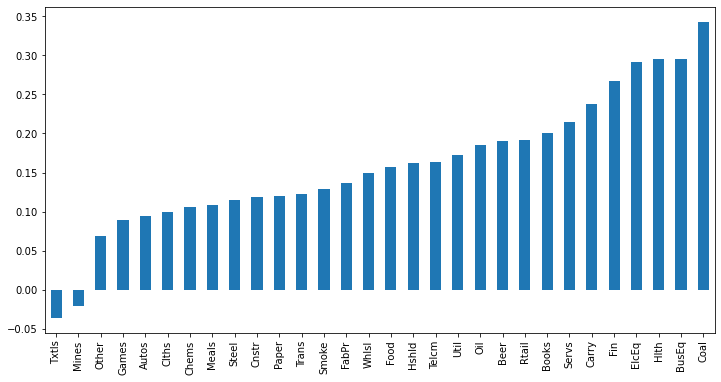

In [54]:
er.sort_values().plot.bar(figsize=(12,6))

In [55]:
cov = ind["1995":'2000'].cov()

In [5]:
er = erk.annualize_rets(ind["1996":"2000"],12)
cov = ind["1996":"2000"].cov()

In [ ]:
def portfolio_return(weights, returns):
    """
    Weights --> returns"""
    return weight.T@returns 

def portfolio_vol(weights, covmat):
    """
    Weights --> vol"""
    return (weights.T @covmat @ weights)**0.5

In [6]:
l = ['Food','Beer','Smoke','Coal']
er[l]

Food     0.116799
Beer     0.141126
Smoke    0.107830
Coal     0.414689
dtype: float64

In [7]:
cov.loc[l,l]

,Food,Beer,Smoke,Coal
Food,0.002609,0.002379,0.002061,0.000027
Beer,0.002379,0.005264,0.001359,0.001728
Smoke,0.002061,0.001359,0.008349,-0.000733
Coal,0.000027,0.001728,-0.000733,0.018641


In [15]:
weights = np.repeat(1/4,4)
erk.portfolio_return(weights, er[l])

0.19511097196038385

In [16]:
erk.portfolio_vol(weights, cov.loc[l,l])

0.055059195776437045

# 2 asset frontier
 

In [17]:
l = ['Games','Fin']
n_points = 20
weights = [np.array([w,1-w]) for w in np.linspace(0,1,n_points)]


In [18]:
weights

[array([0., 1.]),
 array([0.05263158, 0.94736842]),
 array([0.10526316, 0.89473684]),
 array([0.15789474, 0.84210526]),
 array([0.21052632, 0.78947368]),
 array([0.26315789, 0.73684211]),
 array([0.31578947, 0.68421053]),
 array([0.36842105, 0.63157895]),
 array([0.42105263, 0.57894737]),
 array([0.47368421, 0.52631579]),
 array([0.52631579, 0.47368421]),
 array([0.57894737, 0.42105263]),
 array([0.63157895, 0.36842105]),
 array([0.68421053, 0.31578947]),
 array([0.73684211, 0.26315789]),
 array([0.78947368, 0.21052632]),
 array([0.84210526, 0.15789474]),
 array([0.89473684, 0.10526316]),
 array([0.94736842, 0.05263158]),
 array([1., 0.])]

In [24]:
rets = [erk.portfolio_return(w, er[l]) for w in weights]
vols = [erk.portfolio_vol(w, cov.loc[l,l]) for w in weights]
ef = pd.DataFrame({"R":rets,"Vol":vols})

<AxesSubplot:xlabel='Vol', ylabel='R'>

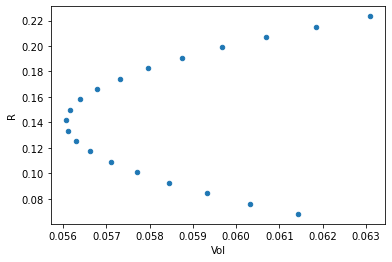

In [27]:
ef.plot.scatter(x="Vol",y="R")

<AxesSubplot:xlabel='Volatility'>

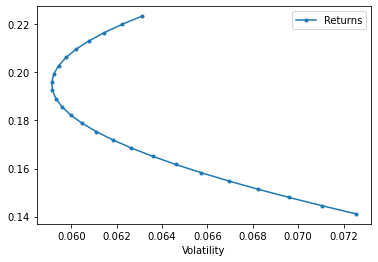

In [41]:
l = ["Fin","Beer"]
erk.plot_ef2(25,er[l],cov.loc[l,l])

# N- Asset Efficient Frontier

In [58]:
def optimal_weights(n_points, er, cov):
    """
    --> list of weights to run the optimizer on to minimize the vol
    """
    target_rs = np.linspace(er.min(), er.max(), n_points)
    weights = [minimize_vol(target_return, er, vol) for target_return in target_rs]
    return weights

def plot_ef(n_points, er, cov):
    """
    Plots the N-asset efficient frontier"""
    weights = optimal_weights(n_points, er, cov)
    rets = [portfolio_return(w, er) for w in weights]
    vols = [portfolio_vol(w, cov) for w in weights]
    ef = pd.DataFrame({"Returns":rets,"Volatility":vols})
    
    return ef.plot.line(x="Volatility", y="Returns", style=".-")

In [44]:
from scipy.optimize import minimize


<AxesSubplot:xlabel='Volatility'>

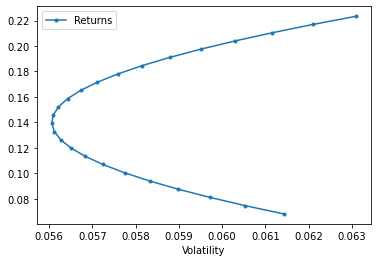

In [45]:
l = ["Games","Fin"]
erk.plot_ef2(25,er[l],cov.loc[l,l])

In [51]:
def minimize_vol(target_return, er, cov):
    """
    target_return --> W"""
    n = er.shape[0]
    init_guess = np.repeat(1/n,n)
    bounds = ((0.0,1.0),)*n
    return_is_target = {
        'type': 'eq',
        'args': (er,),
        'fun': lambda weights, er: target_return - erk.portfolio_return(weights, er)
    }
    weights_sum_to_1 ={
        'type': 'eq',
        'fun': lambda weights: np.sum(weights) - 1
    }
    weights_result = minimize(erk.portfolio_vol, init_guess,args = (cov,), method ="SLSQP", options={'disp': False}, 
                       constraints=(return_is_target, weights_sum_to_1), bounds = bounds )
    return weights_result.x

In [56]:
w15 = erk.minimize_vol(0.15, er[l], cov.loc[l,l])
vol15 = erk.portfolio_vol(w15, cov.loc[l,l])
vol15

0.056163669406706564

In [57]:
w15

array([0.47287631, 0.52712369])

In [65]:
def optimal_weights(n_points, er, cov):
    """
    --> list of weights to run the optimizer on to minimize the vol
    """
    target_rs = np.linspace(er.min(), er.max(), n_points)
    weights = [minimize_vol(target_return, er, cov) for target_return in target_rs]
    return weights

def plot_ef(n_points, er, cov):
    """
    Plots the N-asset efficient frontier"""
    weights = optimal_weights(n_points, er, cov)
    rets = [erk.portfolio_return(w, er) for w in weights]
    vols = [erk.portfolio_vol(w, cov) for w in weights]
    ef = pd.DataFrame({"Returns":rets,"Volatility":vols})
    
    return ef.plot.line(x="Volatility", y="Returns", style=".-")

<AxesSubplot:xlabel='Volatility'>

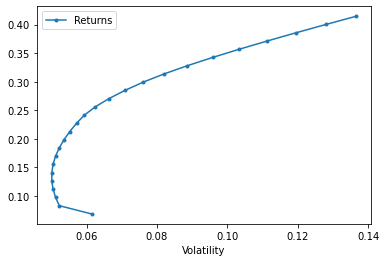

In [68]:
l =['Smoke','Fin','Games','Coal']
erk.plot_ef(25, er[l], cov.loc[l,l])

# Finding the max Sharpe Ratio Portfolio

In [80]:
def msr(riskfree_rate, er, cov):
    """
    risk_free_rate + ER + COV --> W
    """
    n = er.shape[0]
    init_guess = np.repeat(1/n,n)
    bounds = ((0.0,1.0),)*n
    weights_sum_to_1 ={
        'type': 'eq',
        'fun': lambda weights: np.sum(weights) - 1
    }
    def negative_sharp_ratio(weights, riskfree_rate,er,cov):
        """
        Returns the sharpe_ration given weights
        """
        r = erk.portfolio_return(weights,er)
        vol = erk.portfolio_vol(weights, cov)
        return -(r - riskfree_rate)/vol
        
    weights_result = minimize(negative_sharp_ratio, init_guess,args = (riskfree_rate, er,cov,), method ="SLSQP", options={'disp': False}, 
                       constraints=(weights_sum_to_1), bounds = bounds )
    return weights_result.x

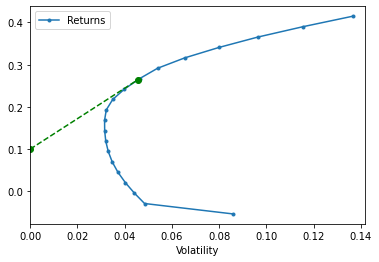

In [81]:
ax = erk.plot_ef(20,er,cov)
ax.set_xlim(left = 0)
rf = 0.1
w_msr = msr(rf, er, cov)
r_msr = erk.portfolio_return(w_msr, er)
vol_msr = erk.portfolio_vol(w_msr, cov)
#add CML
cml_x = [0,vol_msr]
cml_y = [rf, r_msr]
ax.plot(cml_x,cml_y, color='green', marker ="o", linestyle="dashed")

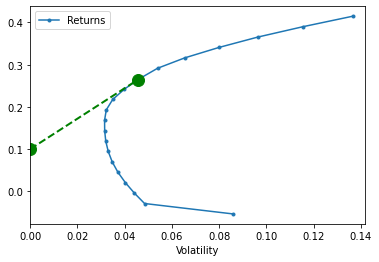

In [89]:
ax = erk.plot_ef(20,er,cov, show_cml=True, riskfree_rate=0.1)

# Lack of Robustness of Markowitz process, and the GMV

In [91]:
l = ['Food','Steel']
erk.msr(0.1,er[l],cov.loc[l,l])

array([0.75040362, 0.24959638])

In [92]:
er[l]

Food     0.116799
Steel    0.115809
dtype: float64

In [94]:
erk.msr(0.1,np.array([0.10,0.13]),cov.loc[l,l])

array([1.38777878e-17, 1.00000000e+00])

In [95]:
erk.msr(0.1,np.array([0.11,0.12]),cov.loc[l,l])

array([0.57930354, 0.42069646])

In [96]:
erk.msr(0.1,np.array([0.13,0.10]),cov.loc[l,l])

array([1., 0.])

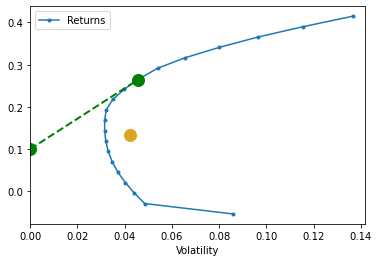

In [99]:
ax = erk.plot_ef(20,er,cov, show_cml=True, riskfree_rate=0.1, show_ew=True)

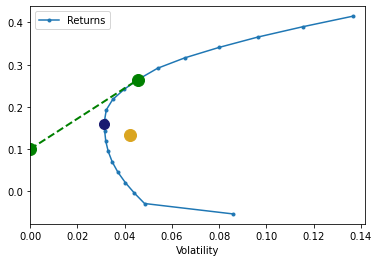

In [103]:
ax = erk.plot_ef(20,er,cov, show_cml=True, riskfree_rate=0.1, show_ew=True, show_gmv=True)